<a href="https://colab.research.google.com/github/maalpi/rede-neural-ppt/blob/main/CNN_PPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <center>__CNN Pedra, Papel ou Tesoura__</center>


# ***Instalando as bibliotecas***

In [ ]:
!pip install flask_cors
!pip install flask-ngrok
!pip install pyngrok
!pip install tensorflow
!pip install rembg
!pip install Flask
!pip install Pillow
!pip install --upgrade pyngrok
!pip install --upgrade imutils



# ***Baixando os arquivos***

> Baixei os dados do **Kagle** em formato zip e hospedei no google drive, o código abaixo apenas faz o download dos arquivos

In [ ]:
import os
import zipfile

In [ ]:
!pip install gdown

# 'pptTrain.zip' contém os dados de treino e será salvo no diretório temporário ‘/tmp/rps.zip’:
!gdown --id 1k3rjkA8lObKyDAQrQyjq0ojZyyw-so6g -O /tmp/pptTrain.zip

# 'pptTest' contém os dados de treino e será salvo no diretório temporário ‘/tmp/rps.zip’:
!gdown --id 1EHjnOsGzNhP8gmX138wkud9e9GjSQOIr -O /tmp/pptTest.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1k3rjkA8lObKyDAQrQyjq0ojZyyw-so6g
From (redirected): https://drive.google.com/uc?id=1k3rjkA8lObKyDAQrQyjq0ojZyyw-so6g&confirm=t&uuid=bfd85590-40c6-41ba-99e0-1d7d10d8ce87
To: /tmp/pptTrain.zip
100% 201M/201M [00:01<00:00, 113MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1EHjnOsGzNhP8gmX138wkud9e9GjSQOIr
From (redirected): https://drive.google.com/uc?id=1EHjnOsGzNhP8gmX138wkud9e9GjSQOIr&confirm=t&uuid=a1b97373-9bb0-4725-86e1-242bb6a98fe1
To: /tmp/pptTest.zip
100% 29.5M/

# ***Descompactando os arquivos***

> Após o download extraímos os .zip utilizando o zipfile e salvamos na pasta 'tmp' do própio colab

In [ ]:
local_zip = '/tmp/pptTrain.zip' # informamos o diretório onde está o arquivo .zip que baixamos
zip_ref = zipfile.ZipFile(local_zip, 'r') # local_zip é o caminho do arquivo e o modo 'r' significa 'read' - queremos ler o arquivo
zip_ref.extractall('/tmp/') # extrai todos os arquivos de zip_ref e grava-os no diretório '/tmp/'
zip_ref.close() # fecha o arquivo zip_ref. Você deve chamar close() antes de sair do seu programa ou registros essenciais não serão gravados

local_zip = '/tmp/pptTest.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [ ]:

rock_files = os.listdir('/tmp/pptTrain/rock') # definimos 'rock_files' como um vetor com todos os nomes dos arquivos da pasta 'rock'
paper_files = os.listdir('/tmp/pptTrain/paper')
scissors_files = os.listdir('/tmp/pptTrain/scissors')

print('total training rock images:', len(rock_files)) # apenas para visualizarmos o tamanho do vetor 'rock_files'
print('total training paper images:', len(paper_files))
print('total training scissors images:', len(scissors_files))

print(rock_files[:10]) # para visualizarmos as 10 primeiras entradas do vetor 'rock_files'
print(paper_files[:10])
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-078.png', 'rock01-021.png', 'rock04-064.png', 'rock02-030.png', 'rock07-k03-104.png', 'rock01-060.png', 'rock07-k03-079.png', 'rock03-017.png', 'rock06ck02-079.png', 'rock05ck01-047.png']
['paper04-014.png', 'paper04-094.png', 'paper07-020.png', 'paper05-014.png', 'paper03-088.png', 'paper06-045.png', 'paper04-058.png', 'paper05-115.png', 'paper01-051.png', 'paper01-111.png']
['testscissors02-116.png', 'scissors04-051.png', 'testscissors01-038.png', 'testscissors02-079.png', 'scissors02-066.png', 'testscissors01-010.png', 'scissors04-116.png', 'scissors02-045.png', 'testscissors03-112.png', 'testscissors01-042.png']


In [ ]:
!pip install --upgrade imutils


### ***Importando as bibliotecas a serem usadas***

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import platform
import datetime
import math
import random

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

%matplotlib inline

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.12
Tensorflow version: 2.17.0
Keras version: 3.4.1


# ***Plotando uma imagem para teste***

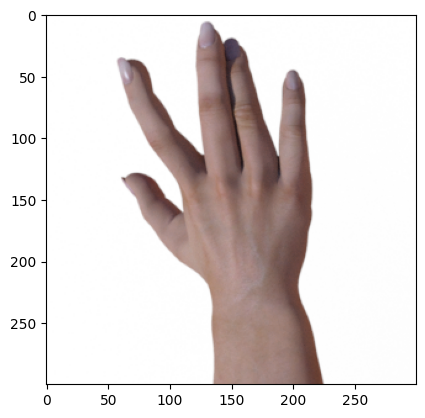

In [ ]:
img = mpimg.imread('/tmp/pptTrain/paper/paper01-009.png')
plt.imshow(img)
plt.axis('On')
plt.show()


# ***KERAS***

## Pre-processamento de imagens

> O 'train_datagen' é configurado para aumentar os dados de treinamento aplicando varias transformações como rotação e deslocamento.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normaliza os valores de pixel entre 0 e 1
    rotation_range=40,    # Rotaciona aleatoriamente a imagem
    width_shift_range=0.2,# Desloca horizontalmente
    height_shift_range=0.2,# Desloca verticalmente
    shear_range=0.2,      # Aplica corte aleatório
    zoom_range=0.2,       # Aplica zoom aleatório
    horizontal_flip=True, # Inverte horizontalmente as imagens
    fill_mode='nearest'   # Preenche pixels vazios após transformações
)


test_datagen = ImageDataGenerator(rescale=1./255)

1.  **Train-generation:**

>  Carrega as imagens do diretório de treinamento, redimensionando-as para 150x150 pixels e embaralha as imagens para melhor generalização durante o treinamento.

2.  **Validation_generator:**

>  Faz o mesmo para as imagens de validação, mas não embaralha os dados.

In [ ]:

base_dir_pptTrain = '/tmp/pptTrain'
base_dir_pptTest = '/tmp/pptTest'

train_generator = train_datagen.flow_from_directory(
    base_dir_pptTrain,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
    )

validation_generator = train_datagen.flow_from_directory(
    base_dir_pptTest,
    target_size=(150, 150),
    batch_size=32,
    )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# ***Criando modelo de rede neural convolucional (CNN) usando a API `Sequential` do KERAS***
> Projetado para classificar imagens em três categorias diferentes(pedra,papel e tesoura)






## Oque está acontecendo?


### **1. Camadas convulacionais:**

> Bom, primeiramente ele está iniciando as camadas convolucionais que são responsáveis por extrair características das imagens

> Cada camada usa a função de ativação ReLU para introduzir não linearidades, o que ajuda o modelo a aprender padrões complexos.

>  O número de filtros aumenta gradualmente (32, 64, 128, e 256) para capturar características mais complexas nas imagens à medida que a profundidade da rede aumenta.

### **2. Normalização:**

> a `BatchNormalization` é aplicada para normalizar a saída da camada anterior, o que pode ajudar a acelerar o treinamento e melhorar a estabilidade do modelo.

### **3. Pooling:**

> Reduz a dimensionalidade das saídas das camadas convolucionais, preservando as características mais importantes. Isso ajuda a reduzir o número de parâmetros e a evitar overfitting.

### **4. Flatten:**

> Essa camada pega toda a informação processada pelas camadas anteriores (que ainda está em formato 2D, como se fosse uma imagem) e "achata", transformando tudo em uma única linha de números. Isso prepara os dados para as próximas camadas, onde o modelo vai tomar decisões.

### **5. Dense:**

> Cada neurônio aqui está conectado a todos os neurônios da camada anterior. Ela combina todas as informações para tentar "entender" qual é o resultado, como, por exemplo, se a imagem que foi dada ao modelo é de pedra, papel ou tesoura.

### **6. Overfitting:**

> É usado o `Dropout` para reduzir o overfitting, desligando aleatoriamente 50% dos neurônios durante o treinamento.

In [ ]:
model = tf.keras.models.Sequential([
    # Primeira camada de convolução e pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Segunda camada de convolução e pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Terceira camada de convolução e pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Quarta camada de convolução e pooling (extra)
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten e camadas densas
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout para evitar overfitting
    tf.keras.layers.Dense(3, activation='softmax') # 3 classes no output
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## MobileNetV2

> É um modelo que já foi treinado com milhões de imagens no dataset ImageNet. Ele reaproveita esse conhecimento para o seu projeto, economizando tempo e esforço no treinamento.

>  Quando usado em parceria com outros modelos ( como o anterior ) ele exige mais tempo de treinamento e mais recursos computacionais

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Freeza as camadas do modelo base
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

<ipython-input-28-460440b5307f>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## ***Configurando o processo de treinamento do modelo***


1.   **Função de perda**:
> Definimos a função de perda como categorical crossentropy, que é usada para medir a diferença entre as probabilidades previstas pelo modelo e as categorias reais. Isso é comum em problemas de classificação com mais de duas classes.

2.   **Adam**:
> Um dos mais populares algoritmos de otimização para ajustar os pesos do modelo de forma eficiente durante o treinamento. Ele é conhecido por ser rápido e por combinar as melhores características de outros otimizadores.

3.   **Métricas**:
> A métrica escolhida para monitorar o desempenho do modelo é a acurácia.



In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# ***Iniciando o treinamento***

Esse trecho é responsável por **treinar o modelo** utilizando os dados fornecidos e funciona da seguinte maneira:

1. **model.fit()**: Essa função inicia o treinamento do modelo, ajustando os pesos internos com base nos dados de treinamento.

2. **train_generator**: Este é o gerador de dados de treino, que fornece imagens em lotes (batches) para o modelo aprender. Ele aplica o pré-processamento e a normalização definidos anteriormente.

3. **steps_per_epoch**: Define quantos passos (batches) o modelo deve processar antes de considerar que uma "época" foi concluída. Isso é calculado dividindo o número total de amostras pelo tamanho do lote (batch size).

4. **epochs=20**: Especifica que o modelo será treinado por **20 épocas** (ciclos completos através de todos os dados de treinamento).

5. **validation_data**: Os dados de validação são usados para verificar o desempenho do modelo em dados que ele não viu durante o treinamento.

6. **validation_steps**: Define quantos batches de validação serão processados a cada época, de forma semelhante a `steps_per_epoch`.

7. **verbose=2**: Isso apenas controla o nível de detalhamento da saída que será exibida durante o treinamento. Nesse caso, `verbose=2` significa que será exibido um resumo por época.

Resumindo: esse código treina o modelo com os dados de treinamento, por 20 ciclos, avaliando o progresso a cada época com os dados de validação.

In [ ]:
# TREINAMENTO DO MODELO

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 - 49s - 624ms/step - accuracy: 0.8621 - loss: 0.3872 - val_accuracy: 0.8551 - val_loss: 0.4730
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


78/78 - 3s - 38ms/step - accuracy: 0.9062 - loss: 0.1431 - val_accuracy: 0.9000 - val_loss: 0.2776
Epoch 3/20
78/78 - 24s - 305ms/step - accuracy: 0.9670 - loss: 0.0950 - val_accuracy: 0.7983 - val_loss: 0.6382
Epoch 4/20
78/78 - 0s - 2ms/step - accuracy: 0.9375 - loss: 0.1812 - val_accuracy: 0.8500 - val_loss: 0.4142
Epoch 5/20
78/78 - 41s - 530ms/step - accuracy: 0.9550 - loss: 0.1094 - val_accuracy: 0.9091 - val_loss: 0.2504
Epoch 6/20
78/78 - 0s - 2ms/step - accuracy: 0.9688 - loss: 0.1430 - val_accuracy: 0.9500 - val_loss: 0.1642
Epoch 7/20
78/78 - 22s - 286ms/step - accuracy: 0.9670 - loss: 0.0850 - val_accuracy: 0.9006 - val_loss: 0.2741
Epoch 8/20
78/78 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0207 - val_accuracy: 0.7500 - val_loss: 0.6571
Epoch 9/20
78/78 - 42s - 536ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9290 - val_loss: 0.2437
Epoch 10/20
78/78 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.9500 - val_loss: 0.1669
Epoch 11/20
78/7

# ***Criando a API para receber as requisições com imagem e retornar o vencedor da partida***

> Utilizamos o Framework Flask para criar uma API que recebe 2 imagens(pedra, papel ou tesoura) e retorna o resultado da partida.

> Inicialmente estavamos com problemas com as imagens por conta de terem algo no fundo que dificultava a identificação, por isso tivemos que usar a biblioteca **rembg** para excluir o fundo da imagem e apenas deixar o foco principal

> Também utilizamos o rembg para disponibilizar um link da API para ser consumida

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from PIL import Image
import numpy as np
from pyngrok import ngrok
from tensorflow.keras.preprocessing import image
from rembg import remove

ngrok.set_auth_token("2mUNivMv7xY5BerDMfIdjXMUggD_3MeaoABQWcVrtRn6tKhEe")  # Insira seu token aqui

# Inicializa a aplicação Flask
app = Flask(__name__)
CORS(app, resources={r"/*": {"origins": "*"}})

# Inicia o túnel do ngrok
public_url = ngrok.connect(5000)
print("Ngrok URL:", public_url)  # Imprime a URL do ngrok

def process_image(img_path):
    print(f"Processing image: {img_path}")
    imagFundo = 'output.png'
    input = Image.open(img_path)
    output = remove(input)

    output.save(imagFundo)

    img = image.load_img(imagFundo, target_size=(150, 150))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    # Determine the choice based on the predicted classes
    if classes[0][0] > 0.3:
        choice = 'paper'
    elif classes[0][2] > 0.3:
        choice = 'scissors'
    elif classes[0][1] > 0.5:
        choice = 'rock'
    else:
        choice = 'unknown'

    return classes, choice

def determine_winner(choice1, choice2):
    # Determina o vencedor com base nas escolhas
    if choice1 == 'paper' and choice2 == 'rock':
        return "Player 1 wins with paper!"
    elif choice1 == 'rock' and choice2 == 'scissors':
        return "Player 1 wins with rock!"
    elif choice1 == 'scissors' and choice2 == 'paper':
        return "Player 1 wins with scissors!"
    elif choice2 == 'paper' and choice1 == 'rock':
        return "Player 2 wins with paper!"
    elif choice2 == 'rock' and choice1 == 'scissors':
        return "Player 2 wins with rock!"
    elif choice2 == 'scissors' and choice1 == 'paper':
        return "Player 2 wins with scissors!"
    else:
        return "It's a tie!"

@app.route('/play', methods=['POST'])
def play():
    files = request.files.getlist("images")  # Espera um array de imagens
    print('Received files:', files)
    if len(files) != 2:
        return jsonify({"error": "Please send exactly two images."}), 400

    results = []
    choices = []
    for file in files:
        img_path = f"./temp_{file.filename}"  # Armazena temporariamente
        file.save(img_path)  # Salva a imagem
        classes, choice = process_image(img_path)
        results.append(classes)
        choices.append(choice)

    print(choices)
    winner_message = determine_winner(choices[0], choices[1])
    # return jsonify({"winner": winner_message, "choices": choices})
    return jsonify({"winner": winner_message})

if __name__ == '__main__':
    app.run()  # Não use host='0.0.0.0' no Colab


ModuleNotFoundError: No module named 'flask_cors'

In [ ]:
# from PIL import Image
# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   imagFundo = 'output.png'
#   input = Image.open(path)
#   output = remove(input)

#   background = Image.new("RGBA", output.size, (0, 255, 0, 255))
#   combined = Image.alpha_composite(background, output)

#   combined = combined.convert("RGB")
#   output.save(imagFundo)


#   img = image.load_img(imagFundo, target_size=(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img) / 255.0
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)

#   print(fn)
#   print(classes)
#   if classes[0][0] > 0.3:
#     print('paper')
#   elif classes[0][2] > 0.3:
#       print('scissors')
#   elif classes[0][1] > 0.5:
#       print('rock')
#   else:
#       print('unknown')
